# Wordnet

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
#liste des synsets pouvant contenir le mot dog
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [ ]:
#liste des synsets pouvant contenir le mot cat
wn.synsets("cat")

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset('cat-o'-nine-tails.n.01'),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

In [ ]:
#choix des synsets
dog = wn.synset('dog.n.01')
cat = wn.synset("cat.n.01")

In [ ]:
# Similarity
dog.path_similarity(cat)

0.07692307692307693

In [ ]:
print(dog.hypernyms())
print(cat.hypernyms())

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Synset('feline.n.01')]


In [ ]:
canine = wn.synset('canine.n.02')
feline = wn.synset('feline.n.01')
canine.hypernyms(), feline.hypernyms()

([Synset('carnivore.n.01')], [Synset('carnivore.n.01')])

In [ ]:
canine.path_similarity(feline)

0.3333333333333333

# Count-based representation

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

# exemple de co occurence
dog = [3,  5,   2,   5,     3,   2 ,    9]
lion = [0, 3,   2,   0,     1,   0,     5]
car = [0,  0,   1,   3,     0,   0,     9]

dog = np.array(dog)
lion = np.array(lion)
car =  np.array(car)

def cosine(v1, v2):
  """
  cosine similarity of two vectors
  NB: Standard metric to measure similarity between word vectors
  """
  return dot(v1, v2)/(norm(v1)*norm(v2))

print(f'Similarité entre dog et lion {cosine(dog, lion)} ')
print(f'Similarité entre dog et car {cosine(dog, car)} \n')


# Changeons les vecteurs avec d'autres occurences
dog = [3,  5,   2,   5,     3,   2 ,    24]
car = [0, 0, 1, 3, 0, 0,0]
print(f'Nouvelle similarité dog et lion {cosine(dog, lion)}')
print(f'Nouvelle similarité dog et car {cosine(dog, car)} \n')
print(f"Qu'observez-vous? \n")


Similarité entre dog et lion 0.8562344018852232 
Similarité entre dog et car 0.8198899317865649 

Nouvelle similarité dog et lion 0.8904965536163051
Nouvelle similarité dog et car 0.21053539696267973 

Qu'observez-vous? 



# Word2vec

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
!pip install fastText/.
# charger le modèle
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
!unzip wiki.en.zip
import fasttext
w2v = fasttext.load_model('wiki.en.bin')


Cloning into 'fastText'...
remote: Enumerating objects: 3930, done.
remote: Counting objects: 100% (943/943), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 3930 (delta 854), reused 806 (delta 806), pack-reused 2987
Receiving objects: 100% (3930/3930), 8.24 MiB | 18.27 MiB/s, done.
Resolving deltas: 100% (2505/2505), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./fastText
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4382936 sha256=6eab8208d0af5ca19baebf8e0c72b4c4374758fdbd933282f88e0127b165764b
  Stored in directory: /tmp/pip-ephem-wheel-cache-adleq79h/wheels/2d/3b/6c/b1dab8ae56dbff3fc7c26103ce1f0646f1a39f6a06db46db46
Successfully built fasttext
--2023-03-10 08:06:43--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
Resolving dl.fbaipubli

In [ ]:
import numpy as np
vector = w2v.get_word_vector("dog")
# Dimensions ?
print(vector.shape)
# Combien de mot il y'a dans le vocabulaire
len(w2v.words)
#sample de mots
[w2v.words[i] for i in range(10)]


(300,)


[',', '.', 'the', '</s>', 'of', '-', 'in', 'and', "'", ')']

In [ ]:
# Visualization
from sklearn.decomposition import PCA
#%matplotlib notebook
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

def plot_word2vec_embedding(model: fasttext.FastText._FastText, projection="pca",
                            words=None,
                            plot_dir=None,
                            sample=0):

    w2v = np.array([model.get_word_vector(w) for w in words])

    if projection == "pca":
      pca_representations = PCA().fit_transform(w2v)[:,:2]
    else:
      raise(Exception(f"{projection} not supported"))

    plt.figure(figsize=(6,6))
    plt.scatter(pca_representations[:,0], pca_representations[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, pca_representations):
        plt.text(x+0.05, y+0.05, word)
    if plot_dir:
      plt.savefig(plot_dir)

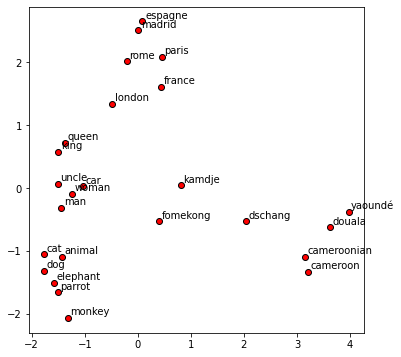

In [ ]:
plot_word2vec_embedding(w2v,
                        words = ['dog', 'cat', 'animal', 'elephant', 'car', 'queen','king', 'monkey', 'parrot', 'cameroon', 'cameroonian',
                         #  'eating', 'barking',
                         'man', 'woman',"uncle", "france","espagne","douala","dschang","fomekong","kamdje",
                         'paris', 'madrid', 'london', "rome", "yaoundé"],
                         plot_dir="./plot_2.png",
                         )

In [ ]:
pairs = [("blue", "red"),
         ("blue", "yellow"),
         ("blue", "green"),
         ("blue", "purple")
         ]

In [ ]:
from numpy import dot
from numpy.linalg import norm

for (w1, w2) in pairs:
  v1 = w2v.get_word_vector(w1)
  v2 = w2v.get_word_vector(w2)
  print(f"Cosine: {w1} vs. {w2} {dot(v1, v2)/(norm(v1)*norm(v2))}")

Cosine: blue vs. red 0.6610223054885864
Cosine: blue vs. yellow 0.6871858239173889
Cosine: blue vs. green 0.6225948333740234
Cosine: blue vs. purple 0.6628549695014954
